In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando perguntas e respostas

In [2]:
with open("data/all_questions.txt", 'r') as f:
    all_questions = f.readlines()
    all_questions = [ex.strip() for ex in all_questions]

with open("data/all_answers.txt", 'r') as f:
    all_answers = f.readlines()
    all_answers = [ex.strip() for ex in all_answers]

In [3]:
qa_df = pd.DataFrame(columns=['questions', 'answers'])
qa_df['questions'] = all_questions
qa_df['answers'] = all_answers

In [4]:
qa_df.head()

,questions,answers
0,What is the hero's name in The Legend of Zelda?,"Despite most people's believes, he's called Link"
1,What are the names of the ghosts who chase Pac...,"Inky, Blinky, Pinky, and Clyde"
2,What's the name of the Mythbusters' crash test...,The Mythbusters' crash test dummy is called Bu...
3,What is an Oxford comma?,The hotly contested punctuation before a conju...
4,Who was the captain of the Enterprise in the p...,The captain of the Enterprise in the pilot epi...


In [5]:
# Serializando QA como um csv para facilitar a manipulação.
qa_df.to_csv('data/qa_data.csv')

# Análise do tamanho das perguntas/respostas

Verificação do tamanho das perguntas e respostas em termos de número de tokens. Serão avaliados dois tipos de tokens: 
- Tokens separados por espaços
- Token BPE (utilizados pelo OPT)

In [6]:
import spacy
from transformers import AutoTokenizer, GPT2Tokenizer

/home/kenzosaki/anaconda3/envs/transformers/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
nlp = spacy.load("pt_core_news_md")
tokenizer = GPT2Tokenizer.from_pretrained('facebook/opt-350m')

In [8]:
# Funções auxiliares para determinar número de tokens
def compute_tokens_spacy(text: str) -> int:
    if type(text) != str: return 0
    return len(nlp(text))

def compute_tokens_transformers(text: str) -> int:
    return len(tokenizer(text, add_special_tokens=False)["input_ids"])


In [9]:
qa_df['q_tokens_spacy'] = qa_df['questions'].apply(compute_tokens_spacy)
qa_df['a_tokens_spacy'] = qa_df['answers'].apply(compute_tokens_spacy)

In [10]:
qa_df['q_tokens_transf'] = qa_df['questions'].apply(compute_tokens_transformers)
qa_df['a_tokens_transf'] = qa_df['answers'].apply(compute_tokens_transformers)

Text(0, 0.5, '')

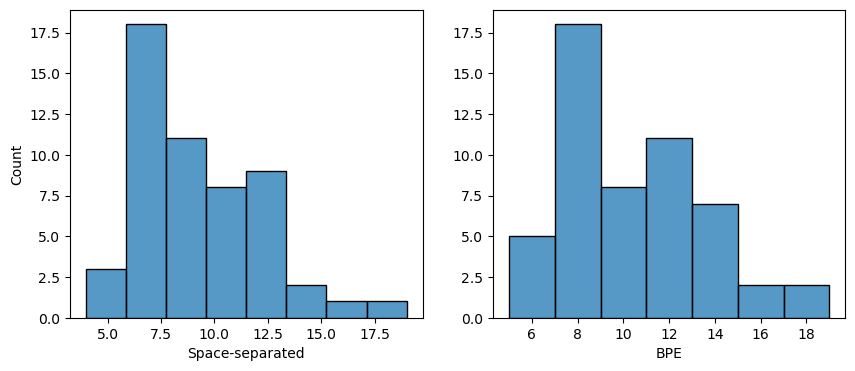

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(qa_df['q_tokens_spacy'], ax=axes[0])
axes[0].set_xlabel('Space-separated')
sns.histplot(qa_df['q_tokens_transf'], ax=axes[1])
axes[1].set_xlabel('BPE')
axes[1].set_ylabel('')

Text(0, 0.5, '')

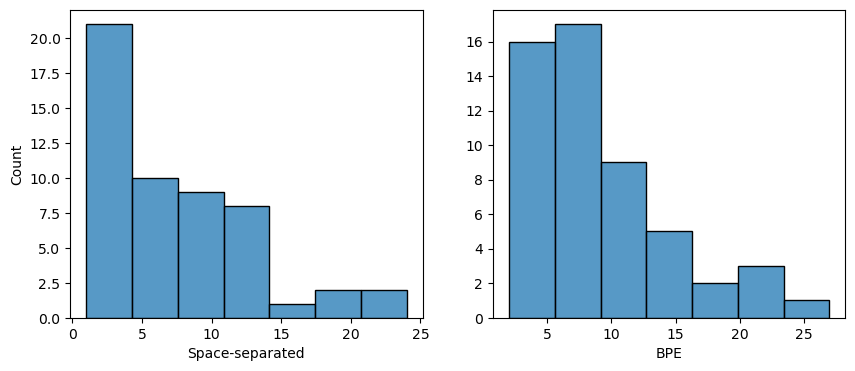

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(qa_df['a_tokens_spacy'], ax=axes[0])
axes[0].set_xlabel('Space-separated')
sns.histplot(qa_df['a_tokens_transf'], ax=axes[1])
axes[1].set_xlabel('BPE')
axes[1].set_ylabel('')

In [21]:
qa_df[['a_tokens_spacy', 'q_tokens_spacy']].describe()

,a_tokens_spacy,q_tokens_spacy
count,53.000000,53.000000
mean,7.301887,9.207547
std,5.940684,3.103091
min,1.000000,4.000000
25%,1.000000,7.000000
50%,6.000000,8.000000
75%,10.000000,11.000000
max,24.000000,19.000000


In [22]:
qa_df[['a_tokens_transf', 'q_tokens_transf']].describe()

,a_tokens_transf,q_tokens_transf
count,53.000000,53.000000
mean,8.924528,9.981132
std,5.794059,3.128594
min,2.000000,5.000000
25%,4.000000,8.000000
50%,8.000000,9.000000
75%,11.000000,12.000000
max,27.000000,19.000000


In [24]:
# Total
qa_df[['a_tokens_transf', 'q_tokens_transf']].sum()

a_tokens_transf    473
q_tokens_transf    529
dtype: int64

# Determinando tokens frequentes

In [ ]:
# TODO